Hello World!

Hello World!


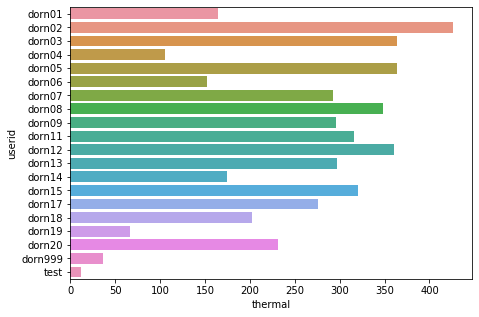

In [40]:
%run main.py

Hello World!

Hello World!
                                  thermal   met  userid experimentid
time                                                                
2020-04-10 10:50:17.314000+08:00       10   9.0  dorn05         dorn
2020-04-10 10:50:28.171000+08:00       11   9.0  dorn08         dorn
2020-04-10 10:57:17.454000+08:00       10   9.0  dorn02         dorn
2020-04-10 11:16:34.270000+08:00       10   9.0  dorn02         dorn
2020-04-10 12:05:00.493000+08:00       10  10.0  dorn02         dorn


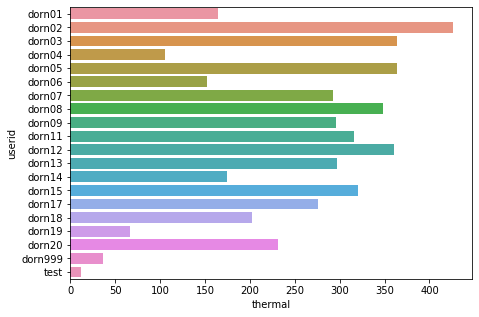

In [41]:
# %load main.py
import matplotlib.pyplot as plt
import pandas as pd
from influxdb import InfluxDBClient
import seaborn as sns
import matplotlib
import os
from IPython.display import display, Markdown
display(Markdown("Hello World!"))
print("Hello World!")

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

def influx_to_df(query='SELECT * FROM "coziePublic"."autogen"."fitbit" where userid=\'test\''):
    import secret

    influx_cl = InfluxDBClient(host=secret.influx_db_host, port=8086,
                               username="heroku", password=secret.influx_db_psw,
                               database="spaces", ssl=True, verify_ssl=True)

    try:
        result = influx_cl.query(query)
        df = pd.DataFrame(result[result.keys()[0]])

        df.index = pd.to_datetime(df.time)
        df.index = df.index.tz_convert(timeZone)
        return df.drop(columns=['time'])
    except IndexError:
        return pd.DataFrame()


experiment_id = 'dorn'
timeZone = 'Asia/Singapore'
start_date = pd.Timestamp(2020, 4, 10).value

try:
    df_cozie = influx_to_df(f'SELECT thermal, met, userid, experimentid '
                            f'FROM "coziePublic"."autogen"."fitbit" '
                            f'where time > {start_date} '
                            f'and "experimentid" = \'{experiment_id}\' '
                            f'and "userid" != \'{"dorn16"}\'')
    df_cozie.to_csv("df_cozie.csv", index=False)
except:
    df_cozie.read_csv("df_cozie.csv", index=False)

print(df_cozie.head())

df_group_id = df_cozie.groupby(['userid'])['thermal'].count().reset_index()

'''```python
print "Hello World"
```'''

fig = plt.figure(figsize=(7.2, 5))
sns.barplot(y="userid", x="thermal", data=df_group_id)
plt.show()

fig_dir = os.path.join(os.getcwd(), 'manuscript', 'src', 'figures')

# fig = plt.figure(figsize=(6, 4))
# sns.barplot(y="userid", x="thermal", data=df_group_id)
# # plt.savefig(os.path.join(fig_dir, 'bar-plot.pgf'))
# plt.savefig(os.path.join(fig_dir, 'bar-plot.png', dpi=300))
